<a href="https://colab.research.google.com/github/shiqinzeng/density/blob/main/density_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/GCS-CAM

Mounted at /content/drive
/content/drive/MyDrive/GCS-CAM


In [4]:
import os
import json
import h5py

def save_hdf5_with_labels(input_file, output_file):
    with open(input_file, 'r') as f:
        records = [json.loads(line) for line in f]

    labeled_data = []
    for record in records:
        # Get the file name without extension
        file_name = os.path.splitext(os.path.basename(input_file))[0]
        if file_name.endswith('Noleakage'):
            label = -1
        else:
            label = 1

        data = {'content': record['content'], 'label': label}
        labeled_data.append(data)

    with h5py.File(output_file, 'a') as hf:
        for i, data in enumerate(labeled_data):
            group = hf.create_group(f'data_{i}')
            group.create_dataset('content', data=data['content'])
            group.create_dataset('label', data=data['label'])

def merge_and_save_hdf5_files(root_dir, output_file):
    with h5py.File(output_file, 'w') as hf:
        for dirpath, _, filenames in os.walk(root_dir):
            for filename in filenames:
                if filename.endswith('.jl2'):
                    input_file = os.path.join(dirpath, filename)
                    save_hdf5_with_labels(input_file, hf)






# Example usage
root_directory = '/content/drive/MyDrive/GCS-CAM/data/shiqin_data/Images_class_wrt_rec_50leak_50noleak/rec100_config'
output_file = '/content/drive/MyDrive/GCS-CAM/data/rec100.h5'  # Specify the full file path for the output HDF5 file
merge_and_save_hdf5_files(root_directory, output_file)


In [5]:
import os
import json
import h5py

def save_hdf5_with_labels(input_file, hf, start_index):
    with open(input_file, 'r') as f:
        records = [json.loads(line) for line in f]

    labeled_data = []
    for record in records:
        # Get the file name without extension
        file_name = os.path.splitext(os.path.basename(input_file))[0]
        if 'Noleakage' in file_name:
            label = -1
        else:
            label = 1

        data = {'content': record['content'], 'label': label}
        labeled_data.append(data)

    # Appending datasets to the HDF5 file with unique keys
    for i, data in enumerate(labeled_data):
        group = hf.create_group(f'data_{start_index + i}')
        group.create_dataset('content', data=data['content'])
        group.create_dataset('label', data=data['label'])

    return start_index + len(labeled_data)  # Return the new index after appending

def merge_and_save_hdf5_files(root_dir, output_file):
    current_index = 0
    with h5py.File(output_file, 'w') as hf:
        for dirpath, _, filenames in os.walk(root_dir):
            for filename in filenames:
                if filename.endswith('.jl2'):
                    input_file = os.path.join(dirpath, filename)
                    current_index = save_hdf5_with_labels(input_file, hf, current_index)

# Example usage
root_directory = '/content/drive/MyDrive/GCS-CAM/data/shiqin_data/Images_class_wrt_rec_50leak_50noleak/rec100_config'
output_file = '/content/drive/MyDrive/GCS-CAM/data/rec100.h5'  # Specify the full file path for the output HDF5 file
merge_and_save_hdf5_files(root_directory, output_file)


In [ ]:
import os
import json
import h5py
import random

def save_hdf5_with_labels(input_file):
    with open(input_file, 'r') as f:
        records = [json.loads(line) for line in f]

    labeled_data = []
    for record in records:
        file_name = os.path.splitext(os.path.basename(input_file))[0]
        if 'Noleakage' in file_name:
            label = -1
        else:
            label = 1

        data = {'content': record['content'], 'label': label}
        labeled_data.append(data)

    return labeled_data

def split_dataset(root_dir):
    leakage_data = []
    non_leakage_data = []

    for dirpath, _, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.endswith('.jl2'):
                input_file = os.path.join(dirpath, filename)
                labeled_data = save_hdf5_with_labels(input_file)

                # Split into leakage and non-leakage data
                for data in labeled_data:
                    if data['label'] == 1:
                        leakage_data.append(data)
                    else:
                        non_leakage_data.append(data)

    # Randomly sample 5 leakage and 5 non-leakage for the support set
    support_leakage = random.sample(leakage_data, 5)
    support_non_leakage = random.sample(non_leakage_data, 5)

    # Remaining data will be the test set
    remaining_leakage = [x for x in leakage_data if x not in support_leakage]
    remaining_non_leakage = [x for x in non_leakage_data if x not in support_non_leakage]

    support_set = support_leakage + support_non_leakage
    test_set = remaining_leakage + remaining_non_leakage

    return support_set, test_set

def save_hdf5_dataset(data, output_file):
    with h5py.File(output_file, 'w') as hf:
        for i, data_point in enumerate(data):
            group = hf.create_group(f'data_{i}')
            group.create_dataset('content', data=data_point['content'])
            group.create_dataset('label', data=data_point['label'])

# Main logic to save support and test datasets
root_directory = '/content/drive/MyDrive/GCS-CAM/data/shiqin_data/Images_class_wrt_rec_50leak_50noleak/rec100_config'

# Get the support and test sets
support_set, test_set = split_dataset(root_directory)

# Save the support dataset (5 leakage + 5 non-leakage)
support_output_file = '/content/drive/MyDrive/GCS-CAM/data/support.h5'
save_hdf5_dataset(support_set, support_output_file)

# Save the remaining data as the test set
test_output_file = '/content/drive/MyDrive/GCS-CAM/data/test.h5'
save_hdf5_dataset(test_set, test_output_file)


TL


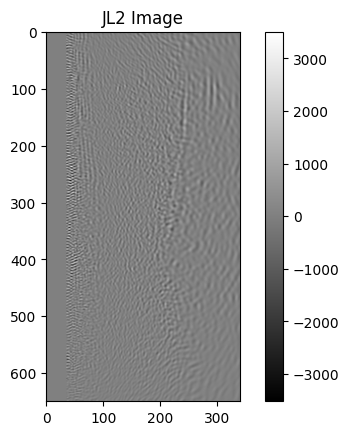

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Function to load .jl2 (HDF5) file
def load_jl2(file):
    with h5py.File(file, 'r') as f:
        # Assuming the data is stored under some dataset, e.g., 'image_data'
        dataset_name = list(f.keys())[0]
        print(dataset_name) # Get the first dataset name
        data = f[dataset_name][:]
    return data

# Load the .jl2 image
image_file = '/content/drive/MyDrive/GCS-CAM/data/shiqin_data/Images_class_wrt_rec_50leak_50noleak/rec100_config/idx=100_nrec=100_nsrc=32_nv=2_phi=220936.45_snr=8.0_Slice_0_NoLeakage.jld2'
image = load_jl2(image_file)

# Plot the image
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('JL2 Image')
plt.show()





In [ ]:
import os
import h5py
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Define a custom dataset class to load and merge .jl2 images
class CustomDataset(Dataset):
    def __init__(self, root_directory):
        self.root_directory = root_directory
        self.jl2_files = self.find_jl2_files()

    def __len__(self):
        return len(self.jl2_files)

    def __getitem__(self, idx):
        file = self.jl2_files[idx]
        try:
            data = self.load_jl2(file)
            # Extract label from file name (-1 for files ending with Nonleakage.jld2)
            label = -1 if file.endswith('Nonleakage.jld2') else 1
            return data, label
        except Exception as e:
            print(f"Error loading image from {file}: {e}")
            return None

    # Function to load .jl2 (HDF5) file
    def load_jl2(self, file):
        with h5py.File(file, 'r') as f:
            # Assuming the data is stored under some dataset, e.g., 'image_data'
            dataset_name = list(f.keys())[0]  # Get the first dataset name
            data = f[dataset_name][:]
        return data

    # Function to recursively find all .jl2 files in a directory
    def find_jl2_files(self):
        jl2_files = []
        for root, dirs, files in os.walk(self.root_directory):
            for file in files:
                if file.endswith('.jld2'):
                    jl2_files.append(os.path.join(root, file))
        return jl2_files

# Define the root directory
root_directory = '/content/drive/MyDrive/GCS-CAM/data/shiqin_data/Images_class_wrt_rec_50leak_50noleak/rec100_config'

# Create a custom dataset
custom_dataset = CustomDataset(root_directory)

# Create a data loader
batch_size = 1  # Set batch size to 1 to visualize each sample individually
test_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=False)

# Iterate over batches in the test loader
for batch_idx, batch in enumerate(test_loader):
    data, label = batch
    data = data.squeeze()  # Remove the batch dimension if present
    label = label.item()   # Extract the label value
    # Visualize the data sample
    plt.figure()
    plt.imshow(data, cmap='gray')
    plt.colorbar()
    plt.title(f'Data Sample {batch_idx}, Label: {label}')
